In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('dark_background')

# load the dataset
df = pd.read_csv('AirPassengers.csv')
print(df.dtypes)

Month          object
#Passengers     int64
dtype: object


In [9]:
from statsmodels.tsa.stattools import adfuller

In [7]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [2]:
df["Month"]=pd.to_datetime(df["Month"])
print(df.dtypes)

Month          datetime64[ns]
#Passengers             int64
dtype: object


In [6]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


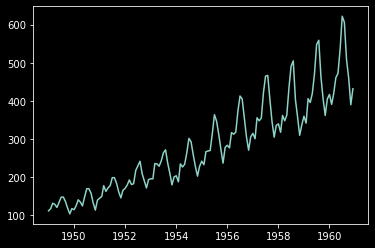

In [8]:
plt.plot(df['#Passengers'])

In [10]:
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_=adfuller(df)

In [11]:
print("pvalue=", pvalue, "if above 0.05, data is not stationary")

pvalue= 0.991880243437641 if above 0.05, data is not stationary


In [12]:
#Since data is not stationary, we may need SARIMA and not just ARIMA

In [13]:
df["year"]=[d.year for d in df.index]

In [14]:
df["month"]=[d.strftime("%b") for d in df.index]

In [15]:
df

,#Passengers,year,month
Month,,,
1949-01-01,112,1949,Jan
1949-02-01,118,1949,Feb
1949-03-01,132,1949,Mar
1949-04-01,129,1949,Apr
1949-05-01,121,1949,May
...,...,...,...
1960-08-01,606,1960,Aug
1960-09-01,508,1960,Sep
1960-10-01,461,1960,Oct


<AxesSubplot:xlabel='year', ylabel='#Passengers'>

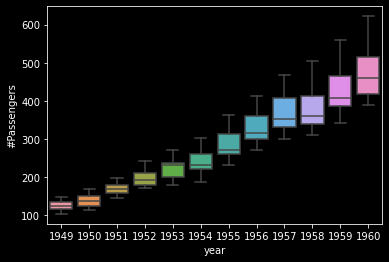

In [18]:
sns.boxplot(x='year', y='#Passengers', data=df)


<AxesSubplot:xlabel='month', ylabel='#Passengers'>

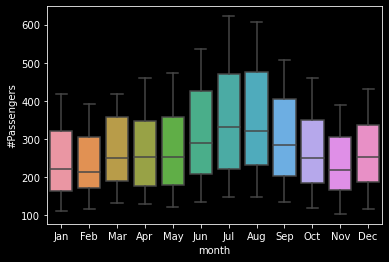

In [19]:
sns.boxplot(x='month', y='#Passengers', data=df)

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [22]:
decomposed= seasonal_decompose(df["#Passengers"], model="additive")

In [24]:
trend= decomposed.trend
seasonal= decomposed.seasonal
residual= decomposed.resid

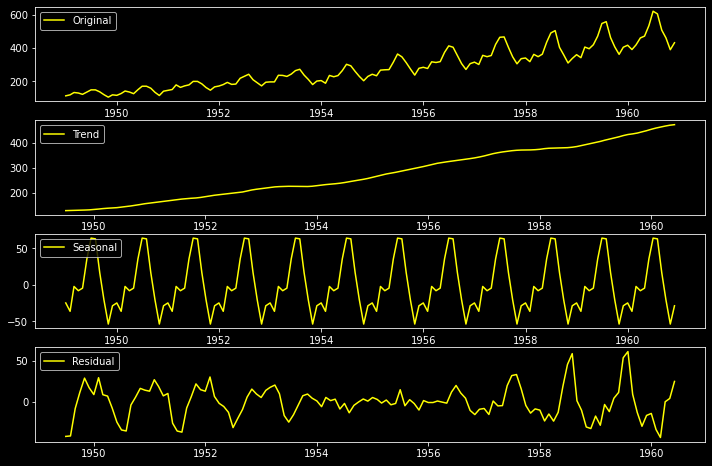

In [26]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df['#Passengers'], label='Original', color='yellow')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='yellow')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='yellow')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='yellow')
plt.legend(loc='upper left')
plt.show()

In [27]:
decomposed2= seasonal_decompose(df["#Passengers"], model="multiplicative ")

In [28]:
trend2= decomposed2.trend
seasonal2= decomposed2.seasonal
residual2= decomposed2.resid

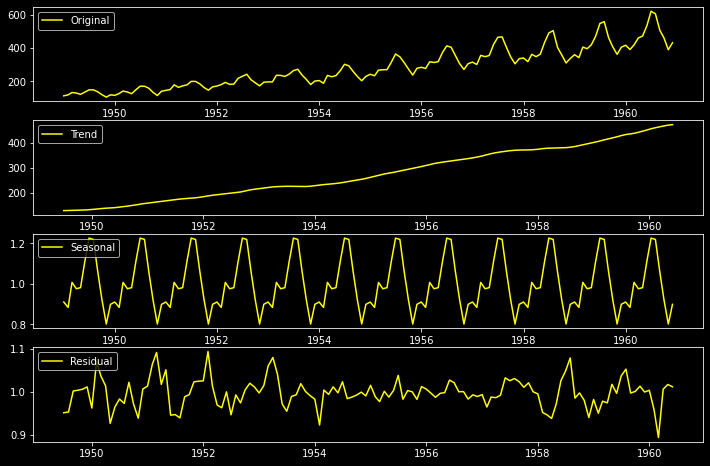

In [29]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df['#Passengers'], label='Original', color='yellow')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend2, label='Trend', color='yellow')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal2, label='Seasonal', color='yellow')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual2, label='Residual', color='yellow')
plt.legend(loc='upper left')
plt.show()

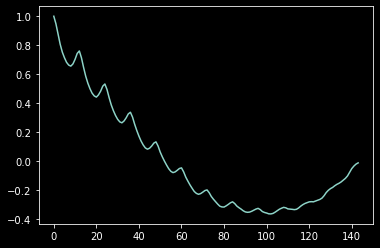

In [33]:
from statsmodels.tsa.stattools import acf

acf_144 = acf(df["#Passengers"], nlags=144)
plt.plot(acf_144)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

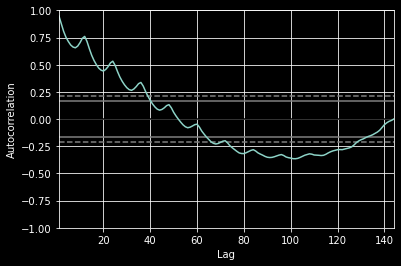

In [34]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df["#Passengers"]) 